In [ ]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
nusc = NuScenes(version='v1.0-mini', dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes', verbose=True)


In [ ]:
print(len(nusc.scene))
nusc.list_scenes()

In [ ]:
my_scene = nusc.scene[0]
my_scene

In [ ]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample

In [ ]:
first_sample = nusc.get('sample', my_scene['first_sample_token'])
first_sample

In [ ]:
sample_tokens_list = []
current_sample = nusc.get('sample', my_scene['first_sample_token'])
sample_tokens_list.append(current_sample['token'])
while not current_sample['next'] == "":
    print(current_sample['token'])
    current_sample = nusc.get('sample', current_sample['next'])
    sample_tokens_list.append(current_sample['token'])

In [ ]:
my_sample['data'].keys()

In [ ]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

In [ ]:
nusc.render_sample_data(cam_front_data['token'], with_anns=False)

In [ ]:
cam_front_data['calibrated_sensor_token']

In [ ]:
nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])

In [ ]:
nusc.get('ego_pose', cam_front_data['ego_pose_token'])


In [ ]:
from nuscenes.can_bus.can_bus_api import NuScenesCanBus
nusc_can = NuScenesCanBus(dataroot='/media/jim/Hard Disk/nuscenes_data/sets/nuscenes')

In [ ]:
scene_name = my_scene['name']
print(scene_name)
nusc_can.print_all_message_stats(scene_name)

In [67]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
print("ms_imu")
print(ms_imu[0])
print("pose")
print(pose[0])

ms_imu
{'linear_accel': [-0.41128969192504883, -0.4808080792427063, 10.184659004211426], 'q': [0.1937936693429947, -0.00936870463192463, -0.015247208997607231, 0.9808790683746338], 'rotation_rate': [0.011562108993530273, 0.027134936302900314, 0.016453981399536133], 'utime': 1532402927649034}
pose
{'accel': [-0.5754005977462526, -0.21511667861912834, 10.015971965254076], 'orientation': [0.5721097147684122, 0.0, 0.0, -0.8201770993313615], 'pos': [411.2494814111038, 1180.7432096568386, 0.0], 'rotation_rate': [0.004477957729250193, 0.02866952493786812, 0.017157725989818573], 'utime': 1532402927665106, 'vel': [8.988725931436823, 0.0, 0.0]}


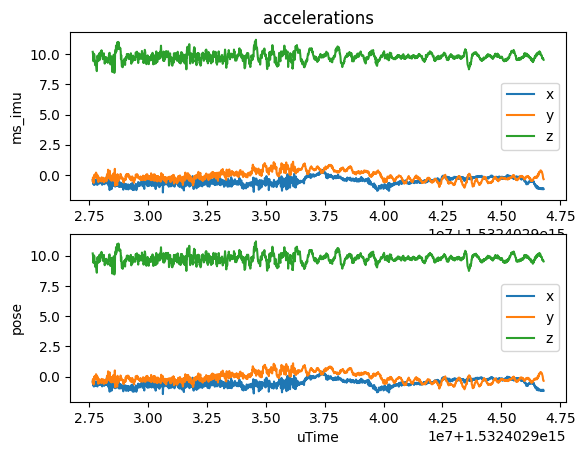

In [97]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
ms_imu_rot = np.array([(m['utime'], m['linear_accel'][0], m['linear_accel'][1], m['linear_accel'][2]) for m in ms_imu])

plt.subplot(2, 1, 1)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.title("accelerations")
plt.ylabel('ms_imu')
plt.legend(['x', 'y', 'z'])

pose_rot = np.array([(m['utime'], m['accel'][0], m['accel'][1], m['accel'][2]) for m in pose])

plt.subplot(2, 1, 2)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.xlabel('uTime')
plt.ylabel('pose')
plt.legend(['x', 'y', 'z'])

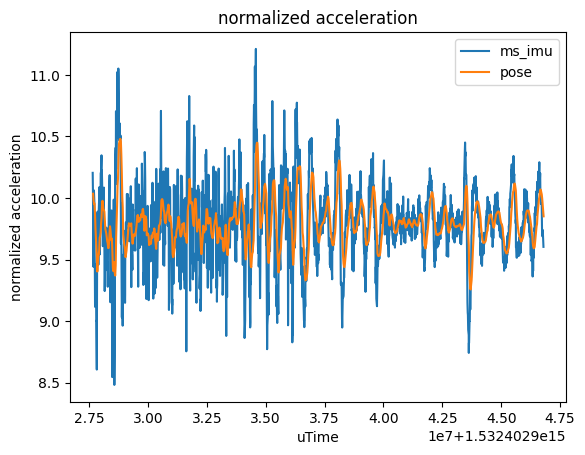

In [98]:
# IMU: Frequency: 100Hz; Pose: Frequency: 50Hz
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
# ms_imu[0]
ms_imu_times = np.array([(m['utime'], np.linalg.norm(m['linear_accel'])) for m in ms_imu])
pose_times = np.array([(m['utime'], np.linalg.norm(m['accel'])) for m in pose])
plt.plot(ms_imu_times[:, 0], ms_imu_times[:, 1])
plt.plot(pose_times[:, 0], pose_times[:, 1])
plt.title("normalized acceleration")
plt.xlabel('uTime')
plt.ylabel('normalized acceleration')
plt.legend(['ms_imu', 'pose']);

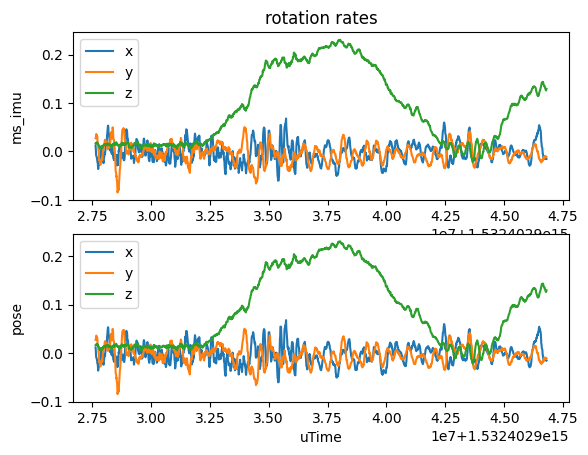

In [100]:
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
ms_imu_rot = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in ms_imu])

plt.subplot(2, 1, 1)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.title("rotation rates")
plt.ylabel('ms_imu')
plt.legend(['x', 'y', 'z'])

pose_rot = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in pose])

plt.subplot(2, 1, 2)
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 1])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 2])
plt.plot(ms_imu_rot[:, 0], ms_imu_rot[:, 3])
plt.xlabel('uTime')
plt.ylabel('pose')
plt.legend(['x', 'y', 'z'])


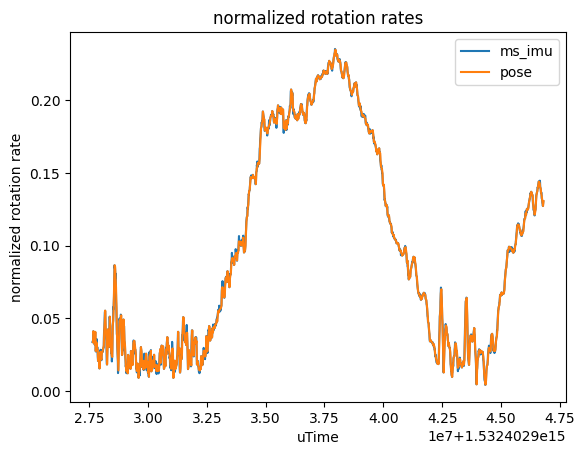

In [96]:
# IMU: Frequency: 100Hz; Pose: Frequency: 50Hz
ms_imu = nusc_can.get_messages(scene_name, 'ms_imu')
pose = nusc_can.get_messages(scene_name, 'pose')
pose_acc = np.array([(m['utime'], m['rotation_rate'][0], m['rotation_rate'][1], m['rotation_rate'][2]) for m in pose])

ms_imu_times = np.array([(m['utime'], np.linalg.norm(m['rotation_rate'])) for m in ms_imu])
pose_times = np.array([(m['utime'], np.linalg.norm(m['rotation_rate'])) for m in pose])
plt.plot(ms_imu_times[:, 0], ms_imu_times[:, 1])
plt.plot(pose_times[:, 0], pose_times[:, 1])
plt.title("normalized rotation rates")
plt.xlabel('uTime')
plt.ylabel('normalized rotation rate')
plt.legend(['ms_imu', 'pose']);

Text(0, 0.5, 'vel')

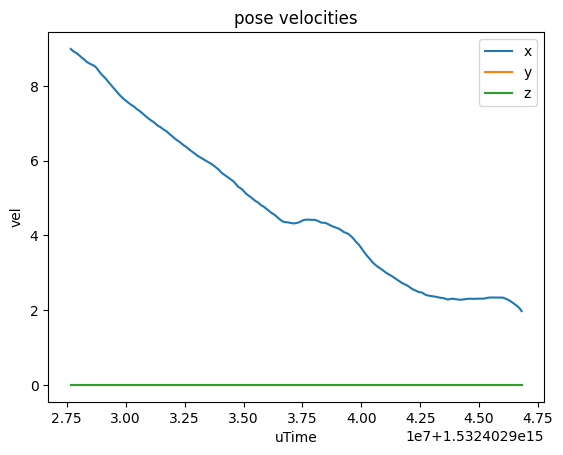

In [103]:
pose = nusc_can.get_messages(scene_name, 'pose')
pose_vel = np.array([(m['utime'], m['vel'][0], m['vel'][1], m['vel'][2]) for m in pose])
plt.plot(pose_vel[:, 0], pose_vel[:, 1])
plt.plot(pose_vel[:, 0], pose_vel[:, 2])
plt.plot(pose_vel[:, 0], pose_vel[:, 3])
plt.title("pose velocities")
plt.legend(['x', 'y', 'z'])
plt.xlabel('uTime')
plt.ylabel('vel')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve raw data.
wheel_speed = nusc_can.get_messages(scene_name, 'zoe_veh_info')
wheel_speed = np.array([(m['utime'], m['FL_wheel_speed']) for m in wheel_speed])

veh_speed = nusc_can.get_messages(scene_name, 'vehicle_monitor')
veh_speed = np.array([(m['utime'], m['vehicle_speed']) for m in veh_speed])

# Convert to m/s.
radius = 0.305  # Known Zoe wheel radius in meters.
circumference = 2 * np.pi * radius
wheel_speed[:, 1] *= circumference / 60
veh_speed[:, 1] *= 1 / 3.6

# Normalize time.
wheel_speed[:, 0] = (wheel_speed[:, 0] - wheel_speed[0, 0]) / 1e6
veh_speed[:, 0] = (veh_speed[:, 0] - veh_speed[0, 0]) / 1e6
plt.plot(wheel_speed[:, 0], wheel_speed[:, 1])
plt.plot(veh_speed[:, 0], veh_speed[:, 1])
plt.xlabel('Time in s')
plt.ylabel('Speed in m/s')
plt.legend(['Wheel speed', 'Vehicle speed']);

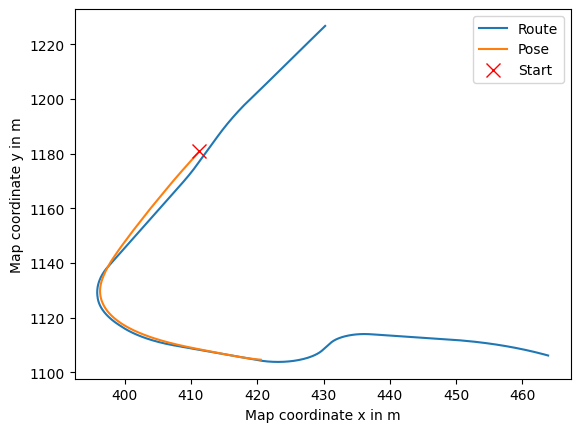

In [74]:
nusc_can.plot_baseline_route(scene_name)

In [81]:
misaligned_routes = nusc_can.list_misaligned_routes()
blacklist = nusc_can.can_blacklist

In [82]:
print(misaligned_routes)
print(blacklist)
print(my_scene['name'] in misaligned_routes)
print(int(my_scene['name'][-4:]) in blacklist)

['scene-0071', 'scene-0073', 'scene-0074', 'scene-0075', 'scene-0076', 'scene-0085', 'scene-0100', 'scene-0101', 'scene-0106', 'scene-0107', 'scene-0108', 'scene-0109', 'scene-0110', 'scene-0111', 'scene-0112', 'scene-0113', 'scene-0114', 'scene-0115', 'scene-0116', 'scene-0117', 'scene-0118', 'scene-0119', 'scene-0261', 'scene-0262', 'scene-0263', 'scene-0264', 'scene-0276', 'scene-0302', 'scene-0303', 'scene-0304', 'scene-0305', 'scene-0306', 'scene-0334', 'scene-0388', 'scene-0389', 'scene-0390', 'scene-0436', 'scene-0499', 'scene-0500', 'scene-0501', 'scene-0502', 'scene-0504', 'scene-0505', 'scene-0506', 'scene-0507', 'scene-0508', 'scene-0509', 'scene-0510', 'scene-0511', 'scene-0512', 'scene-0513', 'scene-0514', 'scene-0515', 'scene-0517', 'scene-0518', 'scene-0547', 'scene-0548', 'scene-0549', 'scene-0550', 'scene-0551', 'scene-0556', 'scene-0557', 'scene-0558', 'scene-0559', 'scene-0560', 'scene-0561', 'scene-0562', 'scene-0563', 'scene-0564', 'scene-0565', 'scene-0730', 'scen

61